# ANALISIS EXPLORATORIO DE DATOS (EDA)

Chequear valores faltantes
Observar tipo de los datos
Observar la distribuciond de los datos
Identificar valores extremos (outliers)
Conclusiones sobre los datos

# Importar Librerias

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
##pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

# Importar Datos

In [3]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving train_values.csv to train_values.csv


In [6]:
uploaded = files.upload()


Saving train_labels.csv to train_labels.csv


In [7]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [ ]:
Check for missing values
Know the data type of each variable
Observe the distribution of the data
Identify and deal with outliers
Make relevant conclusions about the data

In [ ]:
print("# Train Values: {}".format(train_values.shape))
print("# Train Labels: {}".format(train_labels.shape))

# Train Values: (260601, 38)
# Train Labels: (260601, 1)


In [8]:
train_labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [ ]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


# Valores Faltantes

In [ ]:
train_values.isnull().sum() * 100 / len(train_values)

geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber                 0.0
has_superstructure_bamboo         

In [ ]:
train_labels.isnull().sum() * 100 / len(train_values)

damage_grade    0.0
dtype: float64

No se observan a primera vista valores nulos

# Tipos de Datos

In [ ]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [ ]:
train_labels.dtypes

damage_grade    int64
dtype: object

# Frecuencia de la variable de interés: nivel de daño (damage - grade)

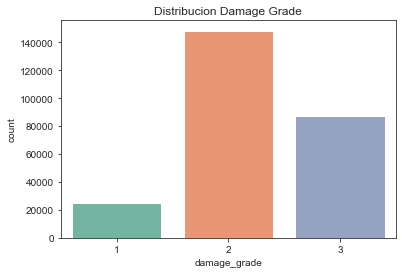

In [ ]:
sns.countplot(x="damage_grade", data=train_labels)
plt.title("Distribucion Damage Grade")
plt.show()

## Distribución del número de pisos en la edificación antes del terremoto.

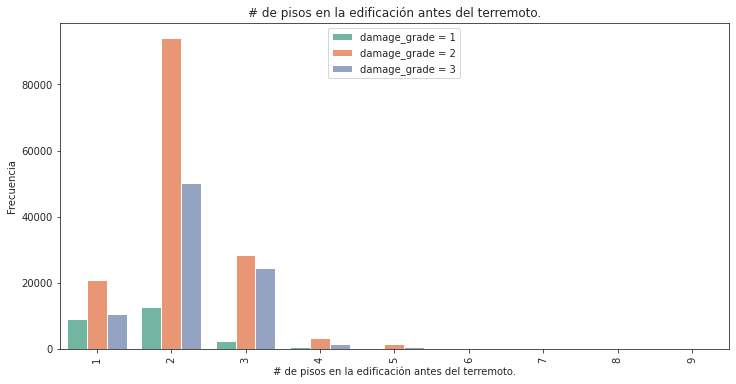

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(train_values["count_floors_pre_eq"], hue=train_labels["damage_grade"])
plt.ylabel("Frecuencia")
plt.xlabel("# de pisos en la edificación antes del terremoto.")
plt.xticks(rotation=90)
plt.title("# de pisos en la edificación antes del terremoto.")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()


Hay edificos de hasta nueve pisos sin embargo la mayoria de los edificios es de 2 pisos.

## Distribución de la antigüedad de la edificación en años.

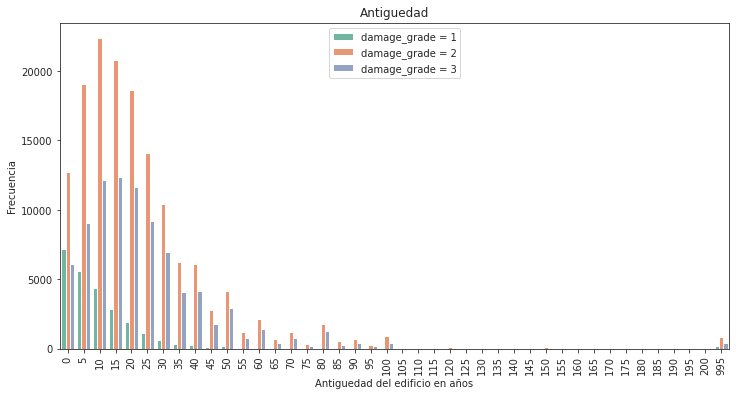

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["age"],hue=train_labels["damage_grade"])
plt.ylabel("Frecuencia")
plt.xlabel("Antiguedad del edificio en años")
plt.xticks(rotation=90)
plt.title("Antiguedad")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Hay edificios registrados con una antiguedad de 995 que a primera vista parecerian erores en la recoleccion de los datos, sin embargo si se investiga sobre esa zona geografica de Nepal se observa que es factible la existencia de edificaciones con esa antiguedad. Se debera analizar mas adelante como deberan ser tratados.

## Superficie normalizada ocupada por la edificación.

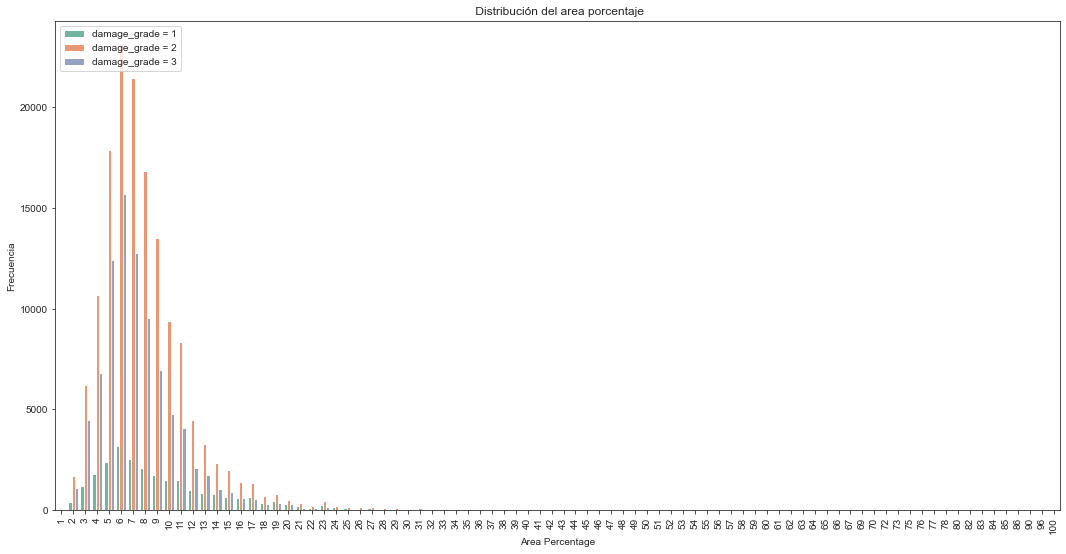

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["area_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frecuencia")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title(" Distribución del area porcentaje")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

## Altura normalizada ocupada por la edificación.

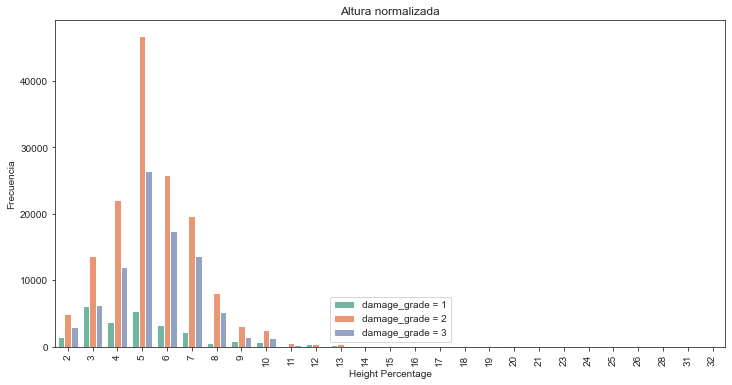

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["height_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frecuencia")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Altura normalizada")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

## Distribucion de la condición de la superficie terrestre donde el edificio fue construido

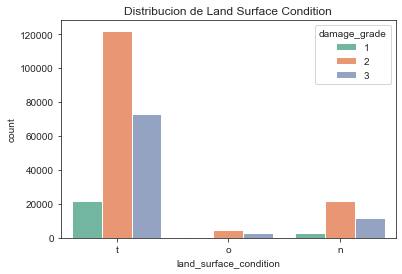

In [ ]:
sns.countplot(x = train_values["land_surface_condition"], hue = train_labels["damage_grade"])
plt.title("Distribucion de Land Surface Condition")
plt.show()

Variable de tipo: categórico que indica la condición de la superficie terrestre donde el edificio fue construido. Valores posibles: n, o, t. El valor con mayor ocurrencia es el tipo t con grado de dano 3

## Distribucion de tipo de cimientos usados cuando se construyó la edificación

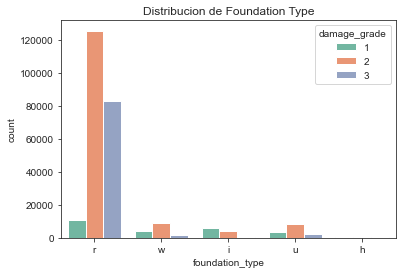

In [ ]:
sns.countplot(x = train_values["foundation_type"], hue = train_labels["damage_grade"])
plt.title("Distribucion de Foundation Type")
plt.show()

Variable de tipo categórico que indica el tipo de cimientos usados cuando se construyó la edificación. Valores posibles: h, i, r, u, w. El valor con mayor ocurrencia es el tipo r con grado de daño 2

## Distribución del tipo de techo usado cuando se construyó la edificación.

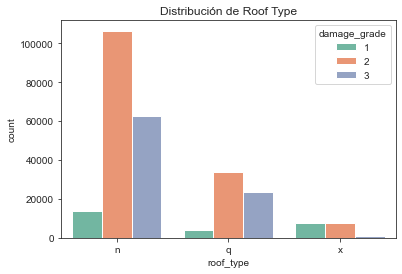

In [ ]:
sns.countplot(x = train_values["roof_type"], hue = train_labels["damage_grade"])
plt.title("Distribución de Roof Type")
plt.show()

Variable de tipo categórico que indica el tipo de techo usado cuando se construyó la edificación. Valores posibles: n, q, x.  El valor con mayor ocurrencia es el tipo n con grado de daño 2

## Distribución del tipo de construcción usado en la planta baja cuando se construyó la edificación.

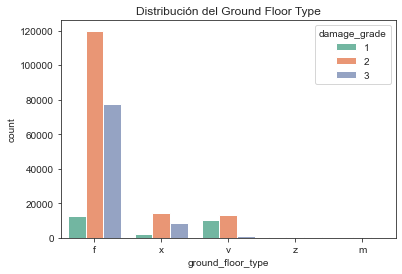

In [ ]:
sns.countplot(x = train_values["ground_floor_type"], hue = train_labels["damage_grade"])
plt.title("Distribución del Ground Floor Type")
plt.show()

Variable de tipo: categórico que indica tipo de construcción usado en la planta baja cuando se construyó la edificación. Valores posibles: f, m, v, x, z. El valor de mayor ocurrencia es f con grado de daño 2.

## Distribución del tipo de construcción usado en otros pisos cuando se construyó la edificación (exceptuando el techo).

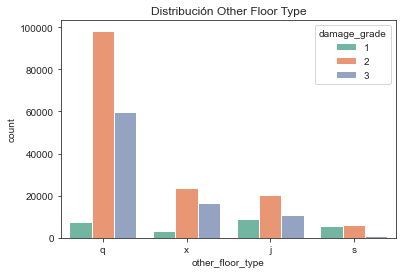

In [ ]:
sns.countplot(x = train_values["other_floor_type"], hue = train_labels["damage_grade"])
plt.title("Distribución Other Floor Type")
plt.show()

Variable de tipo categorical que tipo de construcción usado en otros pisos cuando se construyó la edificación (exceptuando el techo). Posibles valores: j, q, s, x. El valor de mayor ocurrencia es q con grado de daño 2.

## Distribución de la orientación de la edificación. 

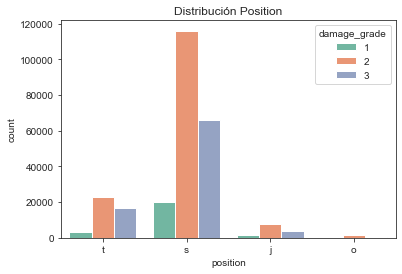

In [ ]:
sns.countplot(x = train_values["position"], hue = train_labels["damage_grade"])
plt.title("Distribución Position")
plt.show()

Variable de tipo ategórico que indica la orientación de la edificación. Posibles valores: j, o, s, t. El valor de mayor ocurrencia es s con grado de daño 2.

##  Distribución del formato de construcción de la edificación (para diseño sísmico).

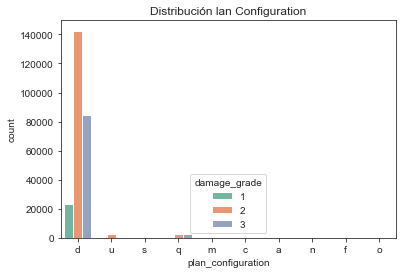

In [ ]:
sns.countplot(x = train_values["plan_configuration"], hue = train_labels["damage_grade"])
plt.title("Distribución lan Configuration")
plt.show()

Variable de tipo categórico) formato de construcción de la edificación (para diseño sísmico). Valores posibles: a, c, d, f, m, n, o, q, s, u. El valor de mayor ocurrencia es d con grado de daño 2.


## Distribución que indica si la edificación fue construida con adobe/barro.


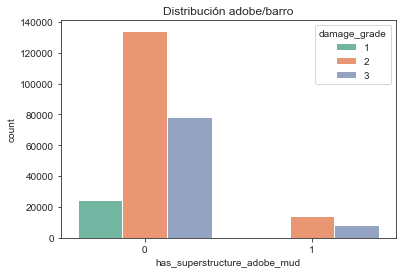

In [ ]:
sns.countplot(x = train_values["has_superstructure_adobe_mud"], hue = train_labels["damage_grade"])
plt.title("Distribución adobe/barro")
plt.show()


Variable (tipo: binario) que indica si la edificación fue construida con adobe/barro.

## Distribución que indica si la edificación fue construida con Barro - Piedra.

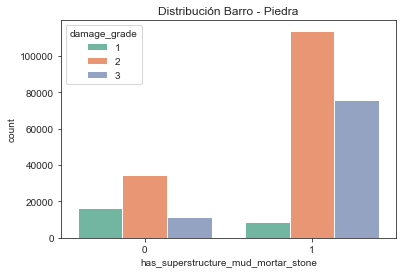

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_stone"], hue = train_labels["damage_grade"])
plt.title("Distribución Barro - Piedra")
plt.show()


Variable (tipo: binario) que indica si la edificación fue construida con  Barro - Piedra.¶

## Distribución que indica si la edificación fue construida con piedra

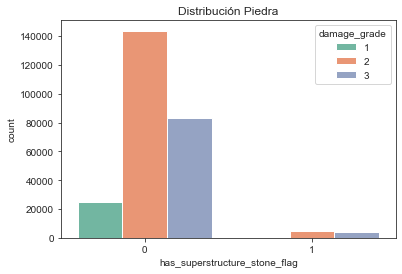

In [ ]:
sns.countplot(x = train_values["has_superstructure_stone_flag"], hue = train_labels["damage_grade"])
plt.title("Distribución Piedra")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con Piedra.

## Distribución que indica si la edificación fue construida con cemento - piedra.

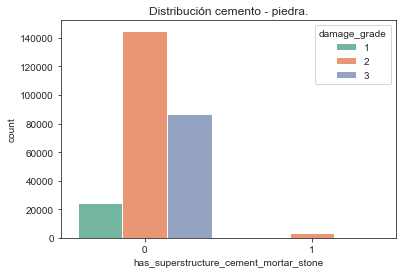

In [ ]:
sns.countplot(x = train_values["has_superstructure_cement_mortar_stone"], hue = train_labels["damage_grade"])
plt.title("Distribución cemento - piedra.")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con cemento - piedra.

## Distribución que indica si la edificación fue construida con barro - ladrillos.

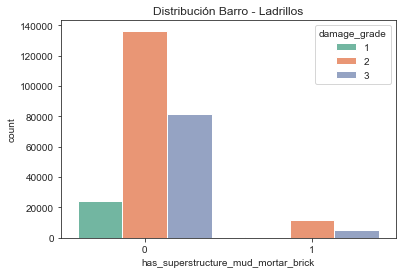

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Distribución Barro - Ladrillos")
plt.show()


Variable (tipo: binario) que indica si la edificación fue construida con Barro - Ladrillos

## Distribución que indica si la edificación fue construida con cemento - ladrillos.

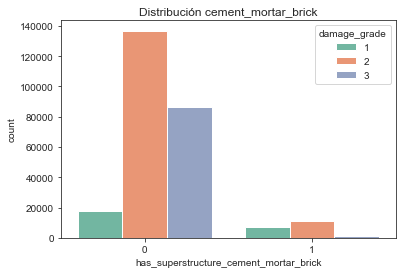

In [ ]:
sns.countplot(x = train_values["has_superstructure_cement_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Distribución cement_mortar_brick")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con cemento - ladrillos..

## Distribución que indica si la edificación fue construida con Timber (madera específica para la construcción).

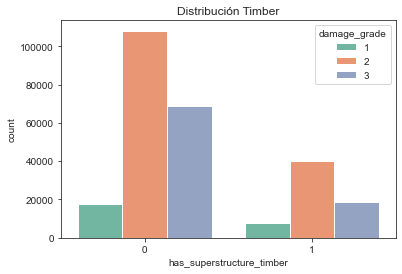

In [ ]:
sns.countplot(x = train_values["has_superstructure_timber"], hue = train_labels["damage_grade"])
plt.title("Distribución Timber")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con Timber.

## Distribución que indica si la edificación fue construida con Bambú (caña).

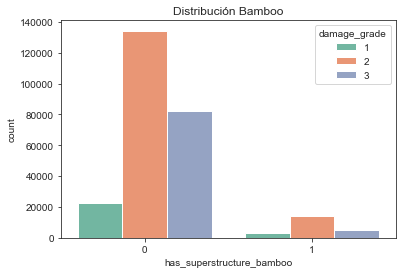

In [ ]:
sns.countplot(x = train_values["has_superstructure_bamboo"], hue = train_labels["damage_grade"])
plt.title("Distribución Bamboo")
plt.show()


Variable (tipo: binario) que indica si la edificación fue construida con Bambú.

## Distribución que indica si la edificación fue construida con concreto reforzado no-diseñado.

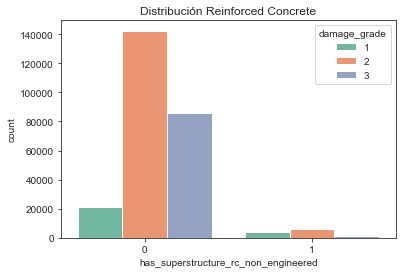

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_non_engineered"], hue = train_labels["damage_grade"])
plt.title("Distribución Reinforced Concrete")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con concreto reforzado no-diseñado..

## Distribución que indica si la edificación fue construida con concreto reforzado diseñado.

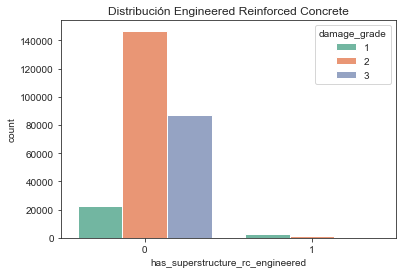

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_engineered"], hue = train_labels["damage_grade"])
plt.title("Distribución Engineered Reinforced Concrete")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con concreto reforzado diseñado.

## Distribución que indica si la edificación fue construida con otro material.

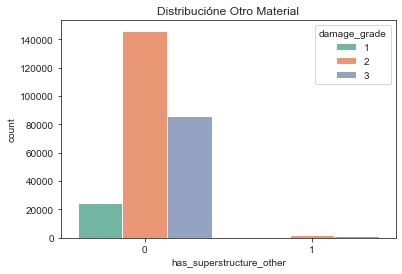

In [ ]:
sns.countplot(x = train_values["has_superstructure_other"], hue = train_labels["damage_grade"])
plt.title("Distribucióne Otro Material")
plt.show()

Variable (tipo: binario) que indica si la edificación fue construida con otro material.

## Distribución que indica estado legal de la tierra donde la edificación fue construida

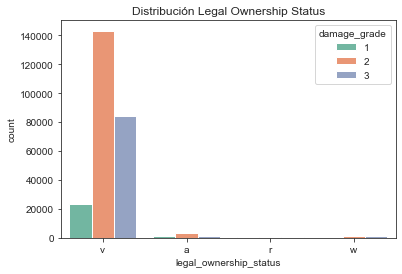

In [ ]:
sns.countplot(x = train_values["legal_ownership_status"], hue = train_labels["damage_grade"])
plt.title("Distribución Legal Ownership Status")
plt.show()


Variable de tipo ategórico que indica estado legal de la tierra donde la edificación fue construida. Posibles valores:  a, r, v, w.

## Distribución del número de familias que vivían en la edificación.

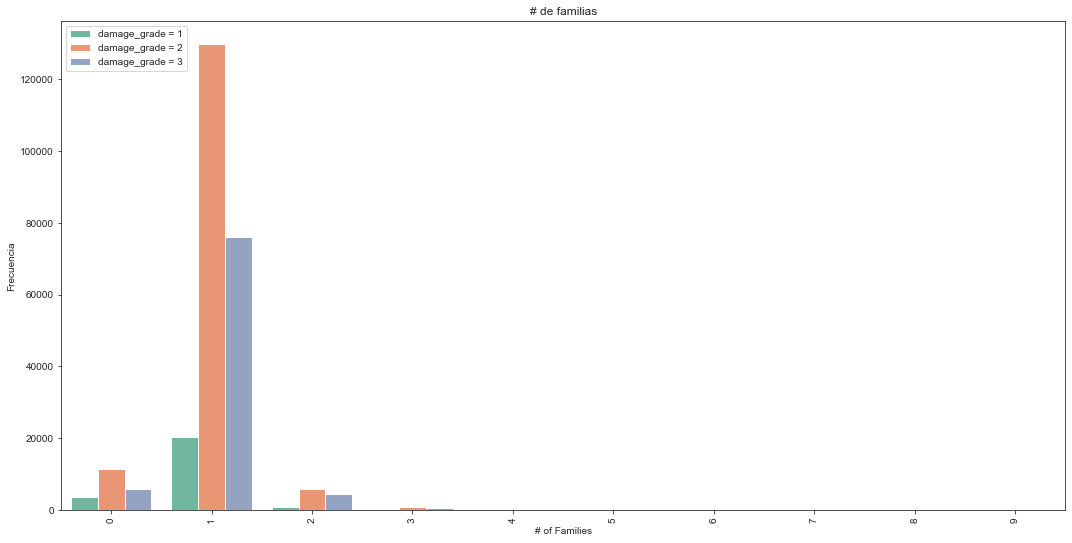

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frecuencia")
plt.xlabel("# of Families")
plt.xticks(rotation=90)
plt.title("# de familias")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

En la mayoria de los edificios habitaban solo una familia.

## Distribución que indica si la edificación era usada con un uso secundario.

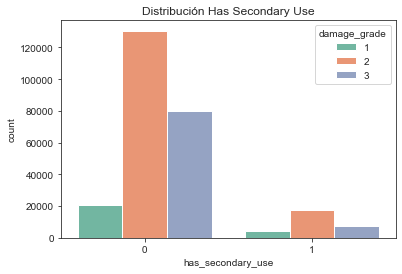

In [ ]:
sns.countplot(x = train_values["has_secondary_use"], hue = train_labels["damage_grade"])
plt.title("Distribución Has Secondary Use")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada con un uso secundario.

## Distribución que indica si la edificación era usada con propósitos de agricultura.

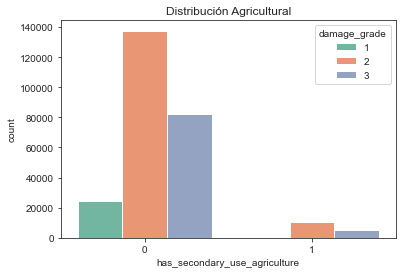

In [ ]:
sns.countplot(x = train_values["has_secondary_use_agriculture"], hue = train_labels["damage_grade"])
plt.title("Distribución Agricultural")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada con propósitos de agricultura.

## Distribución que indica si la edificación era usada como Hotel.

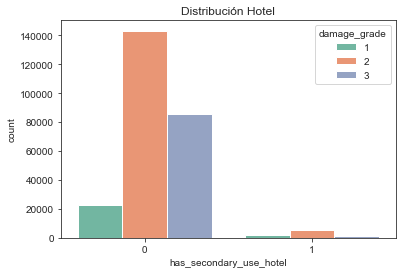

In [ ]:
sns.countplot(x = train_values["has_secondary_use_hotel"], hue = train_labels["damage_grade"])
plt.title("Distribución Hotel")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada como Hotel.

In [ ]:
## Distribución que indica si la edificación se alquilaba.

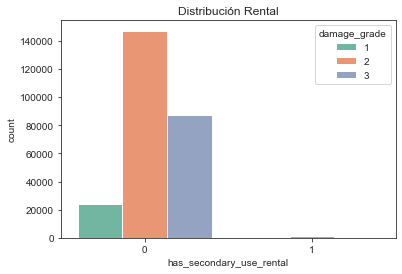

In [ ]:
sns.countplot(x = train_values["has_secondary_use_rental"], hue = train_labels["damage_grade"])
plt.title("Distribución Rental")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada como Hotel.

## Distribución que indica si la edificación se alquilaba.

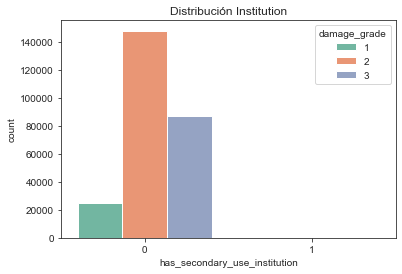

In [ ]:
sns.countplot(x = train_values["has_secondary_use_institution"], hue = train_labels["damage_grade"])
plt.title("Distribución Institution")
plt.show()


Variable (tipo: binario) que indica si la edificación se alquilaba.

## Distribución que indica si la edificación era usada como escuela.

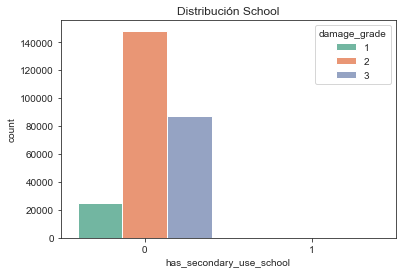

In [ ]:
sns.countplot(x = train_values["has_secondary_use_school"], hue = train_labels["damage_grade"])
plt.title("Distribución School")
plt.show()

Variable (tipo: binario) que indica si la edificación era usada como escuela.

## Distribución que indica si la edificación era usada con propósitos industriales.

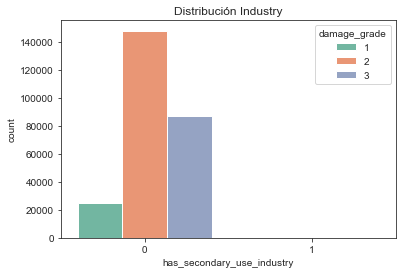

In [ ]:
sns.countplot(x = train_values["has_secondary_use_industry"], hue = train_labels["damage_grade"])
plt.title("Distribución Industry")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada con propósitos industriales.

## Distribución que indica si la edificación era usada como puesto de salud.

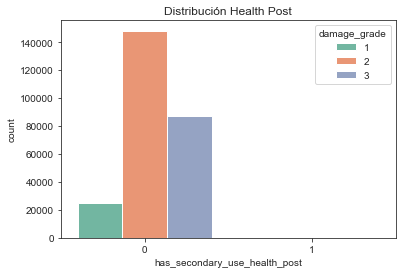

In [ ]:
sns.countplot(x = train_values["has_secondary_use_health_post"], hue = train_labels["damage_grade"])
plt.title("Distribución Health Post")
plt.show()

Variable (tipo: binario) que indica si la edificación era usada como puesto de salud.

## Distribución que indica si la edificación era usada como oficina de gobierno.

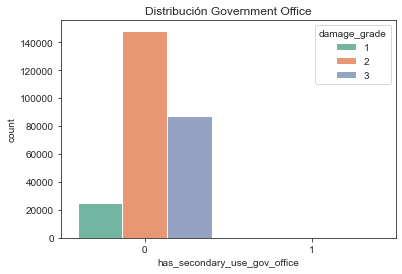

In [ ]:
sns.countplot(x = train_values["has_secondary_use_gov_office"], hue = train_labels["damage_grade"])
plt.title("Distribución Government Office")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada como oficina de gobierno.

## Distribución que indica si la edificación era usada como estación de policía.

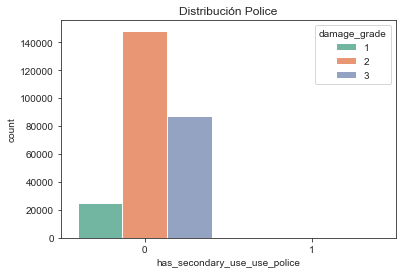

In [ ]:
sns.countplot(x = train_values["has_secondary_use_use_police"], hue = train_labels["damage_grade"])
plt.title("Distribución Police")
plt.show()


Variable (tipo: binario) que indica si la edificación era usada como estación de policía.

## Distribución que indica si la edificación era usada con otro uso secundario.

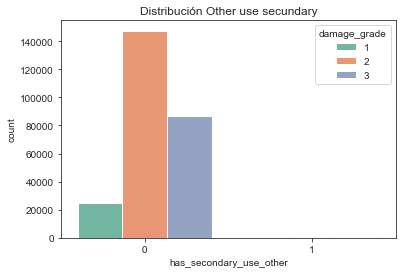

In [ ]:
sns.countplot(x = train_values["has_secondary_use_other"], hue = train_labels["damage_grade"])
plt.title("Distribución Other use secundary")
plt.show()

Variable (tipo: binario) que indica si la edificación era usada con otro uso secundario.

In [11]:
train_labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


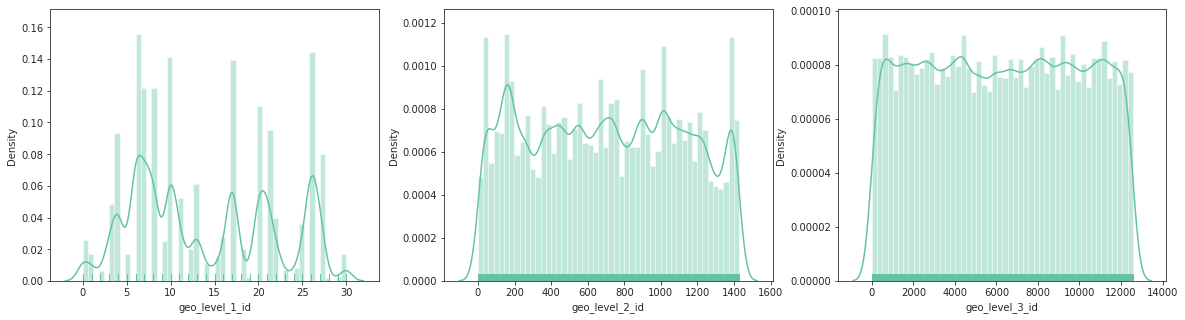

In [12]:
fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
sns.distplot(train_values['geo_level_1_id'], rug=True, ax = axes[0])
sns.distplot(train_values['geo_level_2_id'], rug=True, ax = axes[1])
sns.distplot(train_values['geo_level_3_id'], rug=True, ax = axes[2])

geo_level_2_ y geo_level_3 tienen una distribucion uniforme
  

** Indice de porcentaje de contrucciones realizadas segun tipo de material utilizado**

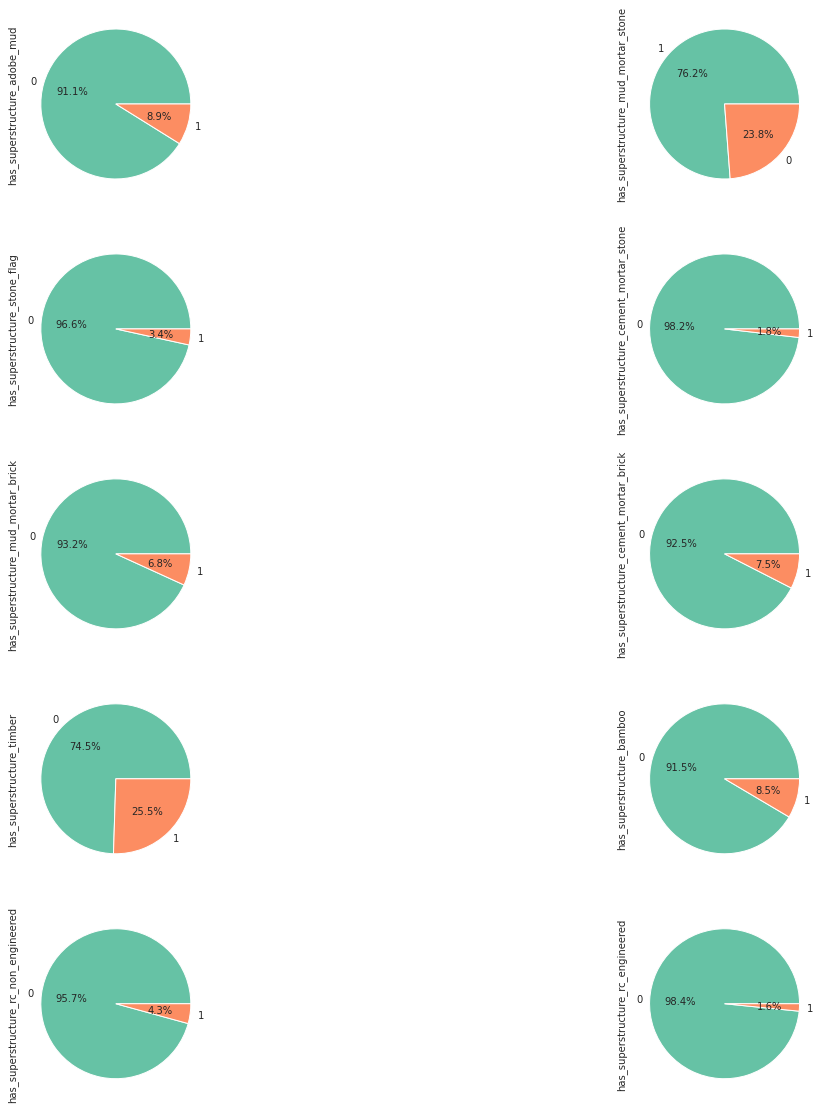

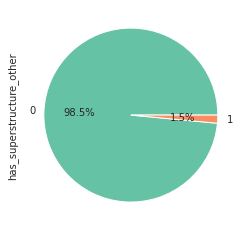

In [13]:
cols = [['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone'], ['has_superstructure_stone_flag', 
        'has_superstructure_cement_mortar_stone'], ['has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick'], ['has_superstructure_timber', 'has_superstructure_bamboo'], 
        ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']]

fig, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (20,20))
for i, c in enumerate(cols):
    train_values[c[0]].value_counts().plot.pie(autopct="%.1f%%", ax = axes[i][0])
    train_values[c[1]].value_counts().plot.pie(autopct="%.1f%%", ax = axes[i][1])
plt.show()
train_values['has_superstructure_other'].value_counts().plot.pie(autopct = "%.1f%%")
plt.show()

**Relacion entre tipo de construccion y daño realizado**


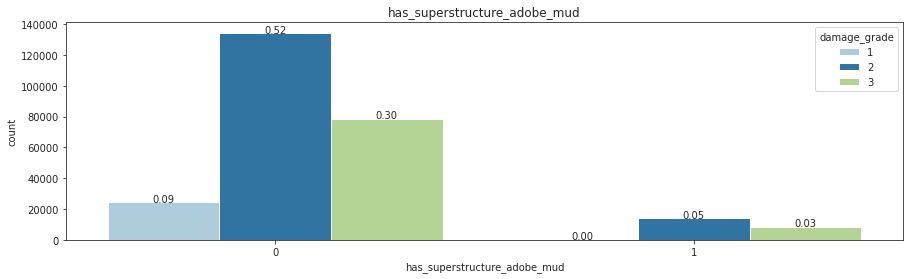

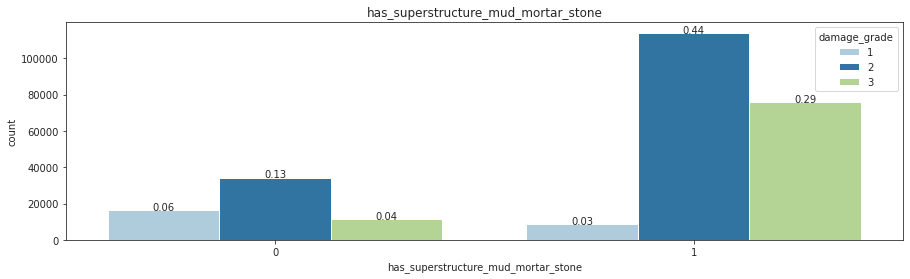

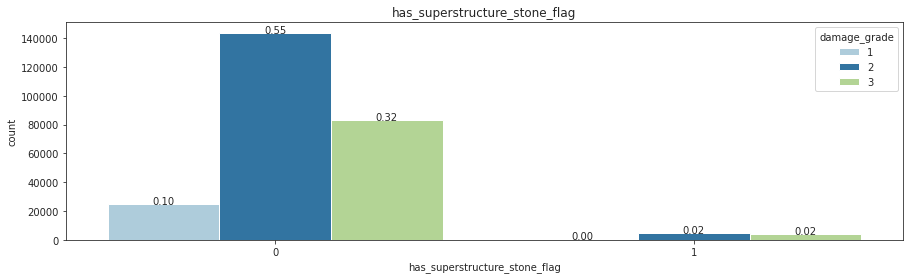

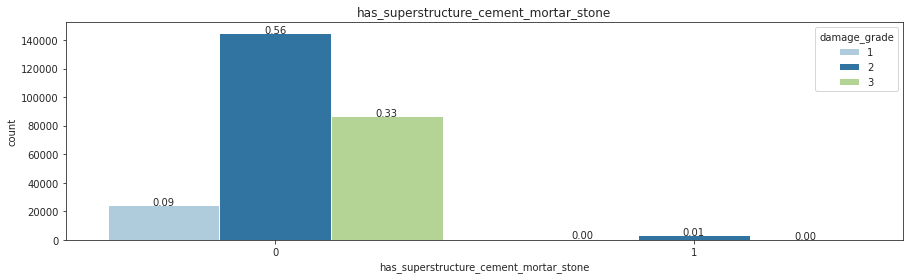

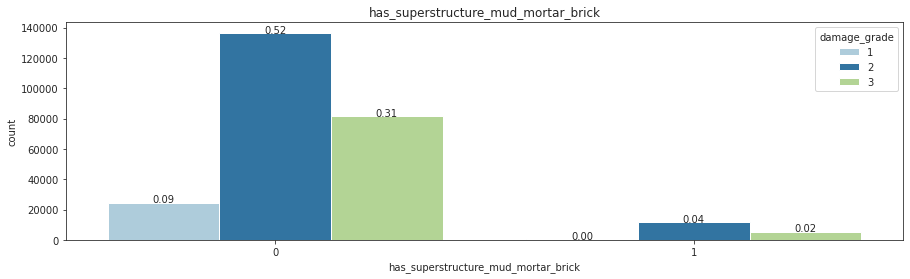

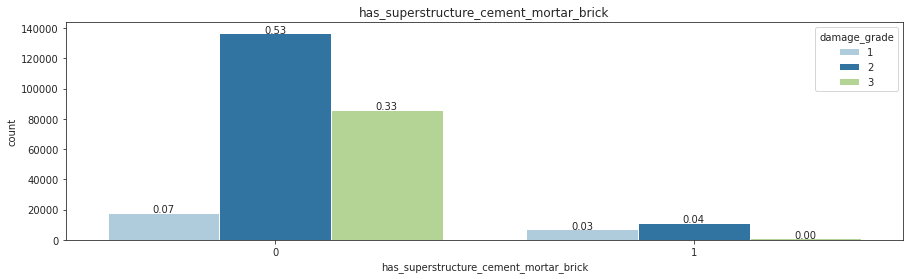

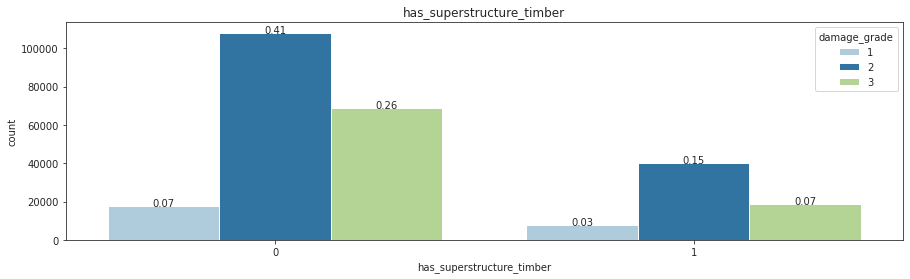

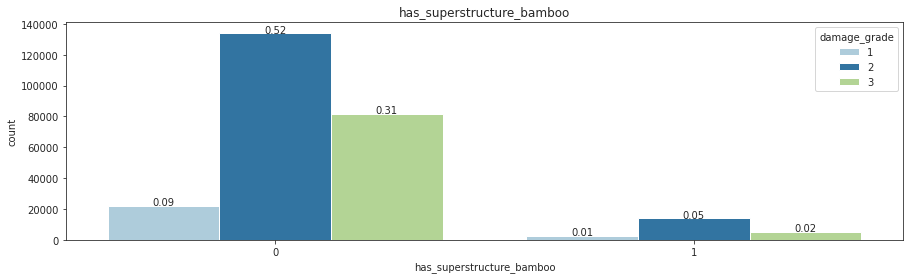

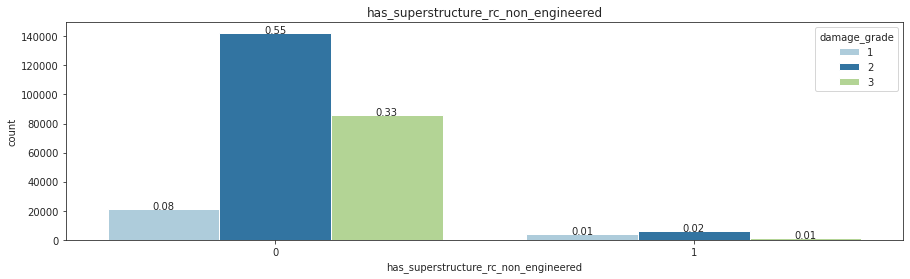

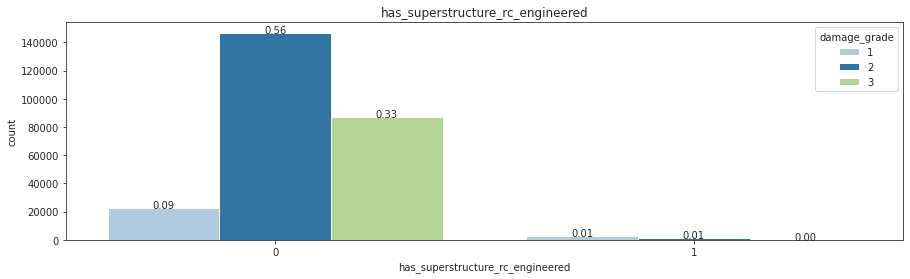

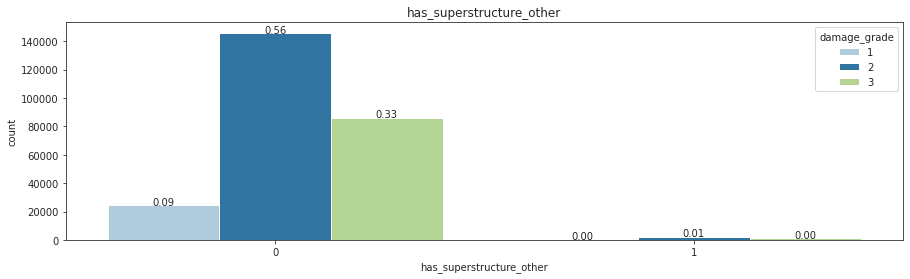

In [16]:
cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
        'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
        'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other'
       ]

for c in cols:
    plt.figure(figsize=(15,4))
    total = float(len(train_values[c])) 
    ax = sns.countplot(x = train_values[c], hue=train_labels.damage_grade, palette='Paired')
    plt.title(c)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 
    plt.show()